In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [214]:
dataset = 3

In [215]:
# Experiments path
path = "C:\\Users\\luiz_\\Jupyter\\Quantifiers\\experiments\\"
datas = []
datas.append(pd.read_csv(f"{path}exp0.csv"))
datas.append(pd.read_csv(f"{path}exp1.csv"))
datas.append(pd.read_csv(f"{path}exp2.csv"))
df = pd.DataFrame(columns=["df","sample","Test_size",'alpha',"actual_prop","pred_prop","abs_error",
                           "quantifier"])

for i, d in enumerate(datas):
    d['df'] = i+1
    df = pd.concat([d, df])
    
df = df.drop(['actual_prop', 'pred_prop'], axis='columns')
df

,sample,Test_size,alpha,abs_error,quantifier,df
0,1,10,0.2,0.00,CC,3
1,1,10,0.2,0.80,ACC,3
2,1,10,0.2,0.04,PCC,3
3,1,10,0.2,0.80,PACC,3
4,1,10,0.2,0.16,X,3
...,...,...,...,...,...,...
1777,3,95,0.8,0.20,T50,1
1778,3,95,0.8,0.02,MS,1
1779,3,95,0.8,0.03,HDy,1
1780,3,95,0.8,0.02,DyS,1


In [216]:
gp = df.groupby(["Test_size", "quantifier", "df"]).median(numeric_only=True)
gp["abs_error"] = gp["abs_error"].round(2)
gp

alpha  abs_error
Test_size quantifier df                  
10        ACC        1     0.5       0.01
                     2     0.5       0.01
                     3     0.5       0.50
          CC         1     0.5       0.00
                     2     0.5       0.00
...                        ...        ...
95        SORD       2     0.5       0.00
          T50        1     0.5       0.20
                     2     0.5       0.02
          X          1     0.5       0.01
                     2     0.5       0.02

[495 rows x 2 columns]

In [217]:
gp['index'] = gp.index
gp = gp.reset_index(drop=True)
gp

,alpha,abs_error,index
0,0.5,0.01,"(10, ACC, 1)"
1,0.5,0.01,"(10, ACC, 2)"
2,0.5,0.50,"(10, ACC, 3)"
3,0.5,0.00,"(10, CC, 1)"
4,0.5,0.00,"(10, CC, 2)"
...,...,...,...
490,0.5,0.00,"(95, SORD, 2)"
491,0.5,0.20,"(95, T50, 1)"
492,0.5,0.02,"(95, T50, 2)"
493,0.5,0.01,"(95, X, 1)"


In [218]:
gp[["Test_size", "quantifier", "df"]] = gp['index'].map(
    lambda x: str(x)[1:-1]).str.split(pat=",", expand=True)
gp = gp.drop(["index", "alpha"], axis="columns")
gp["quantifier"] = gp["quantifier"].str.strip().map(lambda x: str(x)[1:-1])
gp

,abs_error,Test_size,quantifier,df
0,0.01,10,ACC,1
1,0.01,10,ACC,2
2,0.50,10,ACC,3
3,0.00,10,CC,1
4,0.00,10,CC,2
...,...,...,...,...
490,0.00,95,SORD,2
491,0.20,95,T50,1
492,0.02,95,T50,2
493,0.01,95,X,1


In [219]:
gp[["Test_size", "df"]] = gp[["Test_size", "df"]].apply(pd.to_numeric)
gp.dtypes

abs_error     float64
Test_size       int64
quantifier     object
df              int64
dtype: object

In [220]:
gp = gp.groupby(["df", "quantifier"])
gp.get_group((dataset, "CC"))

,abs_error,Test_size,quantifier,df
5,0.40,10,CC,3
60,0.35,20,CC,3
115,0.40,30,CC,3
170,0.43,40,CC,3
225,0.44,50,CC,3
280,0.43,60,CC,3
335,0.36,70,CC,3
390,0.41,80,CC,3
445,0.43,90,CC,3


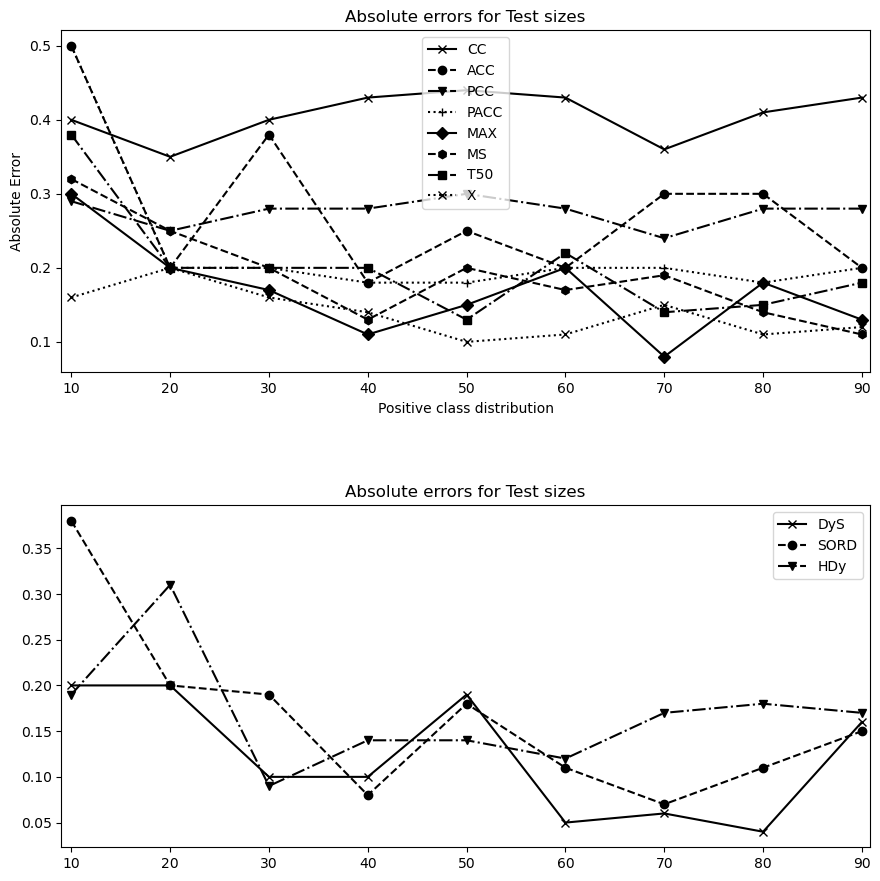

In [222]:
qtfs = ['CC', 'ACC', 'PCC', 'PACC', 'MAX', 'MS', 'T50', 'X']
X = list(gp.get_group((dataset, "CC"))["Test_size"].reset_index(drop=True))
markers = ['x', 'o', 'v', '+', 'D', 'h', 's', 'x', '+', 'h', 'D']
lines=['-', '--', '-.', ':'] * 3

fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

for i, qtf in enumerate(qtfs):
    ax1.plot(X, gp.get_group((dataset, qtf))["abs_error"], label=qtf, linestyle=lines[i], 
         marker=markers[i], color='black')
for i, qtf in enumerate(['DyS', 'SORD', 'HDy']):
    ax2.plot(X, gp.get_group((dataset, qtf))["abs_error"], label=qtf, linestyle=lines[i], 
         marker=markers[i], color='black')
    
ax1.set_title('Absolute errors for Test sizes')
ax1.legend()
ax1.set_xlim([9, 90.8])

ax2.set_title('Absolute errors for Test sizes')
ax2.legend()
ax2.set_xlim([9, 90.8])

ax1.set_xlabel('Positive class distribution')
ax1.set_ylabel('Absolute Error')

fig.tight_layout(pad=5)
plt.show()

In [223]:
quantifiers = ['CC', 'ACC', 'PCC', 'PACC', 'MAX', 'MS', 'T50', 'X','DyS', 'SORD', 'HDy']

In [224]:
abs_err = []
for i in quantifiers:
    abs_err.append(list(gp.get_group((dataset, i))["abs_error"].reset_index(drop=True)))
abs_err

[[0.4, 0.35, 0.4, 0.43, 0.44, 0.43, 0.36, 0.41, 0.43],
 [0.5, 0.2, 0.38, 0.18, 0.25, 0.2, 0.3, 0.3, 0.2],
 [0.29, 0.25, 0.28, 0.28, 0.3, 0.28, 0.24, 0.28, 0.28],
 [0.5, 0.2, 0.2, 0.18, 0.18, 0.2, 0.2, 0.18, 0.2],
 [0.3, 0.2, 0.17, 0.11, 0.15, 0.2, 0.08, 0.18, 0.13],
 [0.32, 0.25, 0.2, 0.13, 0.2, 0.17, 0.19, 0.14, 0.11],
 [0.38, 0.2, 0.2, 0.2, 0.13, 0.22, 0.14, 0.15, 0.18],
 [0.16, 0.2, 0.16, 0.14, 0.1, 0.11, 0.15, 0.11, 0.12],
 [0.2, 0.2, 0.1, 0.1, 0.19, 0.05, 0.06, 0.04, 0.16],
 [0.38, 0.2, 0.19, 0.08, 0.18, 0.11, 0.07, 0.11, 0.15],
 [0.19, 0.31, 0.09, 0.14, 0.14, 0.12, 0.17, 0.18, 0.17]]

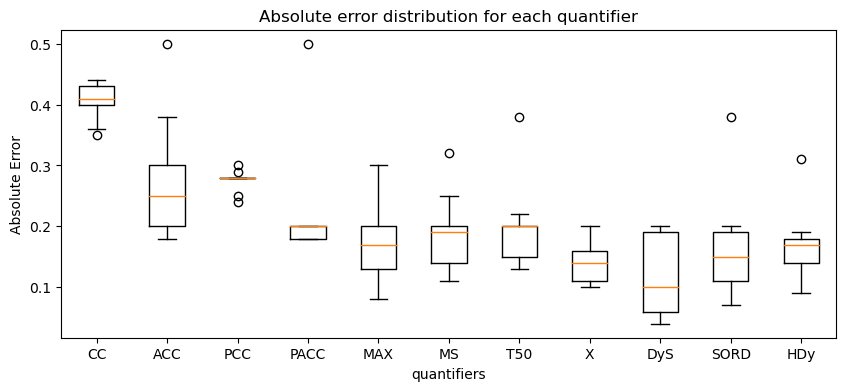

In [225]:
plt.figure(figsize=(10, 4))

plt.boxplot(abs_err)

plt.xticks(range(1, 12), quantifiers)
plt.title("Absolute error distribution for each quantifier")
plt.xlabel("quantifiers")
plt.ylabel("Absolute Error")

plt.show()

In [ ]:
df_mean_err = pd.DataFrame(columns=["Data1", "Data2", "Data3"], index=quantifiers)

for i in range(len(list_size_for_alpha)):
    for size in list_size_for_alpha[i]:
        for idx, qtf in enumerate(list_size_for_alpha[i][size]):
            df_mean_err.iloc[idx, i] =  round(list_size_for_alpha[i][size][qtf]['abs_error'].median(), 2)          

In [ ]:
df_mean_err

In [ ]:
df_mean_err = df_mean_err.rank(ascending=False)
df_mean_err2 = pd.DataFrame(columns=df_mean_err.index, index=df_mean_err.columns)
for i, data in enumerate(df_mean_err):
    df_mean_err2.iloc[i] = df_mean_err[data]
df_mean_err2

In [ ]:
plt.figure(figsize=(12, 10))
plt.boxplot(df_mean_err2)
plt.xticks(range(1, 12), quantifiers)
plt.xlabel("quantifiers")
plt.ylabel("ranking mean")
plt.title("Ranking of best quantifiers (the bigger the better)")
plt.show()